In [1]:
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # to pretty plot pandas dataframe

In [2]:
# we can add to this as we get more data
pathList = []
pathList.append('dataGianni/masterDb-jan-12-2022.csv')
pathList.append('dataGianni/masterDb-jan-18-2022.csv')
pathList.append('dataGianni/masterDb-feb-15-2022.csv')

# make a list of dataframe (from csv files)
dfList = []
for fileIdx,path in enumerate(pathList):
    dfPath = pd.read_csv(path)
    dfPath['myFileIdx'] = fileIdx  # add for our book keeping if necc
    dfList.append(dfPath)

# make a single dataframe from all files in list
dfMaster = pd.concat(dfList, ignore_index=True)


In [3]:
# these are all the columns we have, some are useful and some are not
print(dfMaster.columns)

Index(['Unnamed: 0', 'analysisVersion', 'interfaceVersion', 'file',
       'detectionType', 'cellType', 'sex', 'condition', 'sweep',
       'sweepSpikeNumber', 'spikeNumber', 'include', 'userType', 'errors',
       'dvdtThreshold', 'mvThreshold', 'medianFilter', 'halfHeights',
       'thresholdPnt', 'thresholdSec', 'thresholdVal', 'thresholdVal_dvdt',
       'dacCommand', 'peakPnt', 'peakSec', 'peakVal', 'peakHeight',
       'timeToPeak_ms', 'preMinPnt', 'preMinVal', 'preLinearFitPnt0',
       'preLinearFitPnt1', 'earlyDiastolicDuration_ms', 'preLinearFitVal0',
       'preLinearFitVal1', 'earlyDiastolicDurationRate',
       'lateDiastolicDuration', 'preSpike_dvdt_max_pnt',
       'preSpike_dvdt_max_val', 'preSpike_dvdt_max_val2',
       'postSpike_dvdt_min_pnt', 'postSpike_dvdt_min_val',
       'postSpike_dvdt_min_val2', 'isi_pnts', 'isi_ms', 'spikeFreq_hz',
       'cycleLength_pnts', 'cycleLength_ms', 'diastolicDuration_ms', 'widths',
       'widths_10', 'widths_20', 'widths_50', 'wid

## Useful columns

```
myFileIdx: index of csv we were loaded
file: name of the file
condition: condiiton of recording from ('Control', 'TP')
thresholdSec: time of threshold
thresholdVal: value at threshold
peakSec: time of peak
peakVal: value at peak  # look at the variance
peakHeight: height of peak (peakVal - thresholdVal)
isi_ms: time between peak[i] and peak[i-1]
```

## Clean up the data

Replace conditon 'TG' with 'Thapsigargin'

In [4]:
condList = dfMaster['condition'].unique()
print(f'before condList:{condList}')

# do not do this
#dfMaster[ dfMaster['condition']=='TG' ]['condition'] = 'Thapsigargin'

# do this
dfMaster.loc[dfMaster['condition'] == 'TG', 'condition'] = 'Thapsigargin'

condList = dfMaster['condition'].unique()
print(f'after condList:{condList}')


before condList:['Control' 'Thapsigargin' 'TG']
after condList:['Control' 'Thapsigargin']


## Plot stats in a table

In [5]:
# could set this to any column to get stats
colStr = 'peakVal'

# a list of stats to take per 'file'
aggList = ['count', 'min', 'max', 'mean', scipy.stats.sem, 'median', 'var']

dfStats = dfMaster.groupby(['file','condition','myFileIdx'], as_index=False)[colStr].agg(aggList)

print(f'stats for col: {colStr}')
display(dfStats)

stats for col: peakVal


,,,count,min,max,mean,sem,median,var
file,condition,myFileIdx,,,,,,,
2.5Hz_ctrl_0005.tif,Control,1,13,2.818897,3.118840,2.964127,0.027872,2.983678,0.010099
2.5Hz_ctrl_0009.tif,Control,1,8,2.607111,2.763000,2.690624,0.021312,2.689034,0.003634
2.5Hz_ctrl_0012.tif,Control,1,13,2.758010,3.176939,2.979535,0.040233,3.034222,0.021043
2.5Hz_ctrl_0017.tif,Control,1,9,1.787921,2.417780,2.304765,0.065323,2.362354,0.038404
2.5Hz_ctrl_0028.tif,Control,1,10,2.430220,2.687595,2.582455,0.026511,2.597892,0.007028
2.5Hz_thapsi_0024.tif,Thapsigargin,1,10,1.196586,1.292551,1.235665,0.009530,1.227982,0.000908
220110n_0003.tif,Control,0,10,1.912594,2.003728,1.957616,0.010250,1.965467,0.001051
220110n_0005.tif,Control,0,6,2.232398,2.412802,2.317046,0.028719,2.323407,0.004949
220110n_0009.tif,Control,0,5,2.588777,2.660828,2.621502,0.012971,2.618259,0.000841


## Plot with seaborn

This is my big question. Is the low variance (var) in 'Thapsigargin' condition simply due to the fact that the amplitude of the peak (mean) is small?

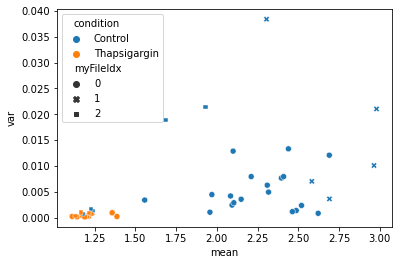

In [6]:
# hold off on using style='file', legend is too long and needs to be tweaked
#sns.scatterplot(x='mean', y='var', hue='condition', style='file', data=dfStats)

sns.scatterplot(x='mean', y='var', hue='condition', style='myFileIdx', data=dfStats);


## for each file, plot the peak versus spike number

Is this decay in the peak predicting our changes in variance?


<AxesSubplot:xlabel='spikeNumber', ylabel='peakVal'>

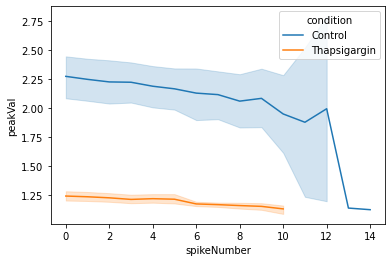

In [7]:
# for each file, plot the peak versus spike number
fig, axs = plt.subplots(1, 1, sharex=False, figsize=(6, 4))

xStat = 'spikeNumber'
yStat = 'peakVal'  # could be any other column in original dataframe

# this is confusing, try it
sns.lineplot(x=xStat, y=yStat, hue='condition', data=dfMaster)

# may be usefull
#files = dfMaster['file'].unique()
#for file in files:
#    dfPlot = dfMaster[ dfMaster['file']==file ]
#    #sns.lineplot(x=xStat, y=yStat, hue='condition', data=dfPlot, legend=False)